<a href="https://colab.research.google.com/github/avisinghal6/Graph-based-Recommender-System/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import os
import random
import math 
from tqdm import tqdm

In [2]:
G=nx.Graph()

In [3]:
os.getcwd()+'/data'

'/content/data'

In [5]:
dir=os.getcwd()+'/data'
videos_to_remove=[]
for filename in os.listdir(dir):
   with open(os.path.join(dir, filename), 'r') as f:
     for line in f.readlines():
      data=line.split("\t")
      related_id=data[9:]
      if len(related_id)>0:
        related_id[-1]=data[-1][:-1]
      
      #REMOVING THOSE NODES WHICH HAVE NO DATA
      if(len(data)==1):
        videos_to_remove.append(data[-1][:-1])
        continue
      G.add_node(data[0],uploader=data[1],age=data[2],category=data[3],length=data[4],views=data[5],rate=data[6],ratings=data[7],comments=data[8])
      for i in range(len(related_id)):
        G.add_edge(data[0],related_id[i])


In [6]:
#REMOVING NODES WHICH HAVE NO FEATURES, MOST PROBABLY THESE NODES WERE NOT REMOVED IN ABOVE CELL
for n in G.nodes():
  if bool(G.nodes[n])==False:
    videos_to_remove.append(n)

In [7]:
for i in videos_to_remove:
  try:
    G.remove_node(i)
  except:
    continue

In [8]:
#IF AFTER REMOVING SOME NODES IF THE NODE HAS NO NEIGHBORS, THEN REMOVE THOSE NODES AS WELL
videos_to_remove=[]
for n in G.nodes():
  if len(list(G.neighbors(n)))==0:
    videos_to_remove.append(n)

In [9]:
for i in videos_to_remove:
  try:
    G.remove_node(i)
  except:
    continue

In [ ]:
G.nodes['OsIVcqVN6VY']

{'uploader': 'Clone0High',
 'age': '1221',
 'category': 'Entertainment',
 'length': '106',
 'views': '53',
 'rate': '0',
 'ratings': '0',
 'comments': '0\n'}

In [ ]:
G.number_of_edges()

131309

In [ ]:
G.number_of_nodes()

48781

In [ ]:
G_converted=nx.convert_node_labels_to_integers(G,first_label=1)

In [ ]:
v = np.random.choice([])

ValueError: ignored

In [10]:
nx.write_edgelist(G_converted, "edges.txt")

NameError: ignored

In [ ]:
with open("edges.txt", "rt") as fin:
    with open("out.txt", "wt") as fout:
        for line in fin:
            fout.write(line.replace('{}', ''))

STATISTICS OF DATA CODE

In [11]:
import matplotlib.pyplot as plt


In [12]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

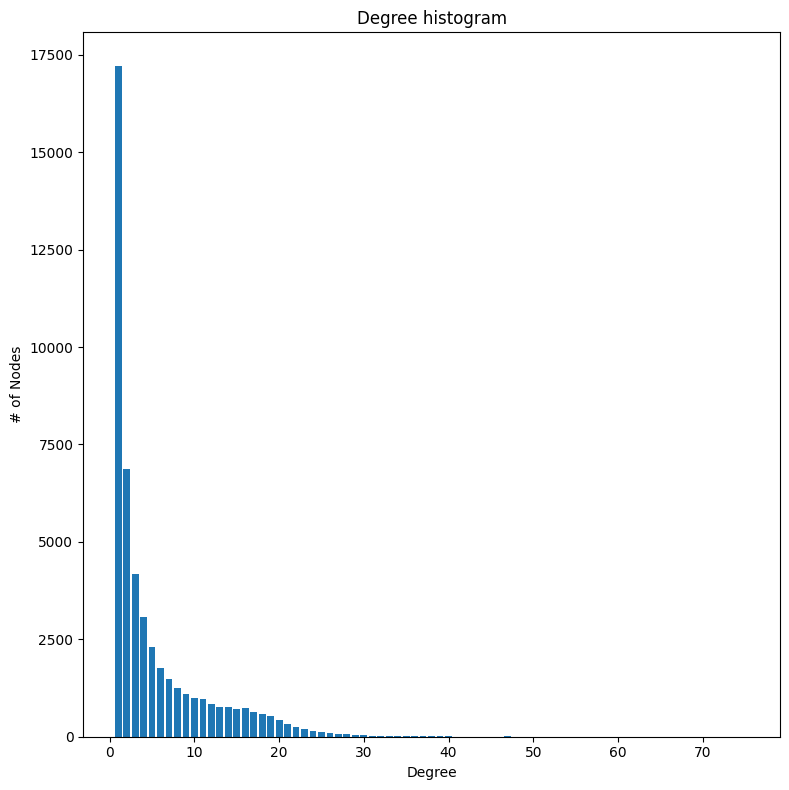

In [13]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(1,1)
ax2 = fig.add_subplot(axgrid[0:, 0:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
fig.tight_layout()
plt.show()

In [ ]:
import itertools
shortest_paths={}
shortest_paths[-1]=0
for u,v in G.edges():
  G.remove_edge(u,v)
  try:
    length=nx.shortest_path_length(G, source=u, target=v)
  except:
    shortest_paths[-1]=shortest_paths[-1]+1
    G.add_edge(u,v)
    continue
  
  if length in shortest_paths:
    shortest_paths[length]=shortest_paths[length]+1
  else:
    shortest_paths[length]=1
  G.add_edge(u,v)


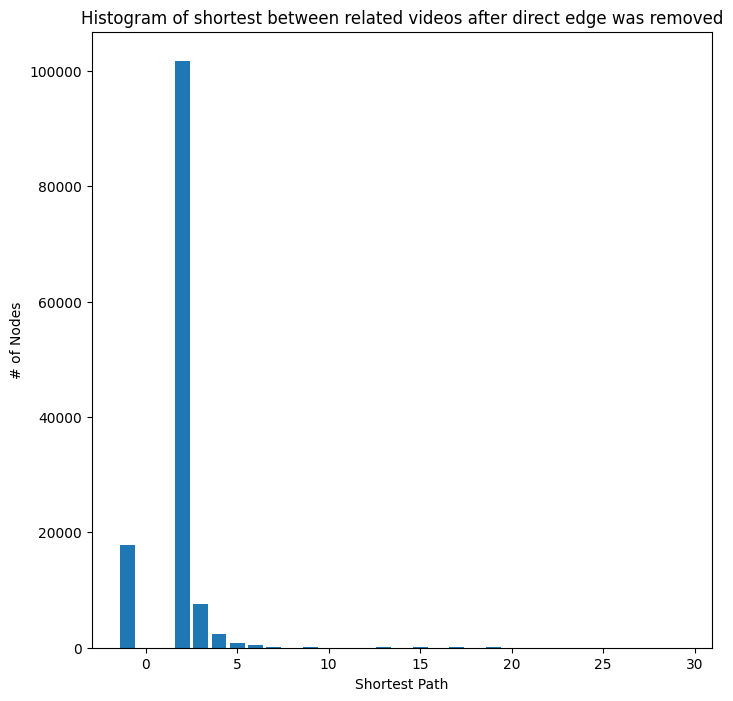

In [ ]:
fig = plt.figure("Histogram of shortest between related videos after direct edge was removed", figsize=(8, 8))
node_pairs=list(shortest_paths.keys())
shortest_path=list(shortest_paths.values())
plt.bar(node_pairs, shortest_path)
plt.title("Histogram of shortest between related videos after direct edge was removed")
plt.xlabel('Shortest Path')
plt.ylabel('# of Nodes')
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
similar_neighbors={}
for n in G.nodes():
  node_genre=G.nodes[n]['category']
  count=0
  same=0
  for i in G.neighbors(n):
    count+=1
    if node_genre==G.nodes[i]['category'] :
      same+=1
  
  percent=same/count
  percent=round(percent*100)
  if percent in similar_neighbors:
    similar_neighbors[percent]=similar_neighbors[percent]+1
  else:
    similar_neighbors[percent]=1

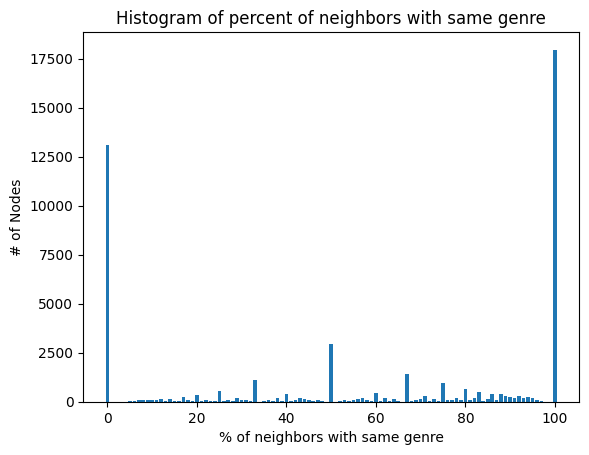

In [ ]:
plt.title("Histogram of percent of neighbors with same genre")
nodes=list(similar_neighbors.keys())
percentage=list(similar_neighbors.values())
plt.bar(nodes,percentage)
plt.xlabel('% of neighbors with same genre')
plt.ylabel('# of Nodes')
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
same_uploader={}
for n in G.nodes():
  uploader=G.nodes[n]['uploader']
  count=0
  same=0
  for i in G.neighbors(n):
    count+=1
    if uploader==G.nodes[i]['uploader'] :
      same+=1
  
  percent=same/count
  percent=round(percent*100)
  if percent in same_uploader:
    same_uploader[percent]=same_uploader[percent]+1
  else:
    same_uploader[percent]=1

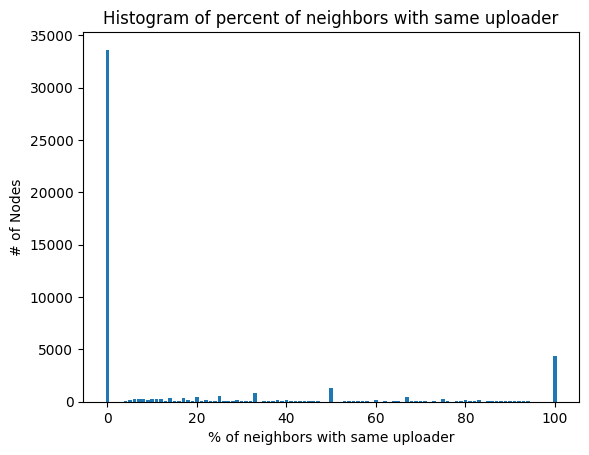

In [ ]:
plt.title("Histogram of percent of neighbors with same uploader")
nodes=list(same_uploader.keys())
percentage=list(same_uploader.values())
plt.bar(nodes, percentage)
plt.xlabel('% of neighbors with same uploader')
plt.ylabel('# of Nodes')
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
same_uploader[0]

33619

In [ ]:
node_views={}
for n in G.nodes():
  node_views[int(G.nodes[n]['views'])]=G.degree[n]

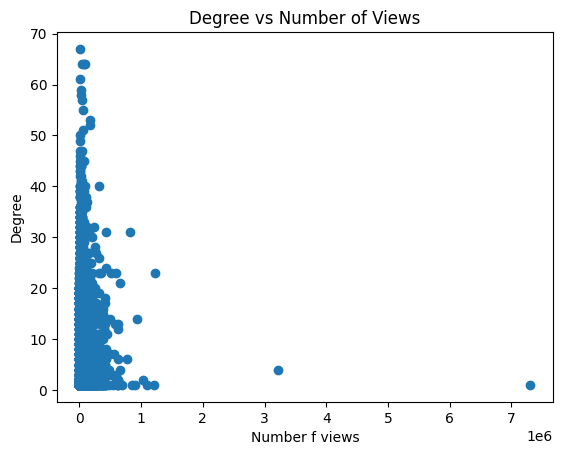

In [ ]:
plt.title("Degree vs Number of Views")
views=list(node_views.keys())
nodes=list(node_views.values())
plt.scatter(views, nodes)
plt.xlabel('Number f views')
plt.ylabel('Degree')
plt.show()

7524

PIXIE RANDOM WALK CODE


In [104]:
def personalizedNeighbor(G,F,currentVideo,visited):
  n=G.neighbors(currentVideo)
  if len(list(G.neighbors(currentVideo)))==0:
    return -1
  probs=[]
  neighbors=[]
  count=0
  for i in G.neighbors(currentVideo):
    p=1
    neighbors.append(i)
    if F['category']==G.nodes[i]['category']:
      p=p*1.5
    
    if F['uploader']==G.nodes[i]['uploader']:
      p=p*1.5

    p=p*(math.sqrt(math.log(int(G.nodes[i]['views'])+3)))

    if currentVideo not in visited:
      p=p*1.5

    probs.append(p)
  
  total=sum(probs)
  probs=[x/total for x in probs]
  
  selected_node=np.random.choice(neighbors, 1,p=probs)[0]

  return selected_node
  

In [105]:
def chooseNeighbor(G):
  nodes=list(G.nodes)
  return random.choice(nodes)

In [106]:

def PixieRandomWalk(q,G,F,N_q,T,V):
  
  for i in G.nodes:
    V[i]=0

  for beta in T:
    currentVideo=q
    visited=set()
    for i in range(int(N_q/len(T))):
      visited.add(currentVideo)
      V[currentVideo]=V[currentVideo]+1
      
      teleport=random.uniform(0, 1)
      if teleport < beta :
        currentVideo=chooseNeighbor(G)
      else:
        currentVideo=personalizedNeighbor(G,F,currentVideo,visited)
      
      while currentVideo==-1:
        currentVideo=chooseNeighbor(G)
  return V

In [107]:
def PixieRandomWalkMultiple(Q,Nq,G,F,N,T):
  Vq=[]
  for i in range(len(Q)):
    Vq.append(PixieRandomWalk(Q[i],G,F,Nq[i],T,{}))
  
  VisitCounts={}
  for v in G.nodes():
    
    total=0
    for i in range(len(Q)):
      total+=math.sqrt(Vq[i][v])
      
    VisitCounts[v]=total*total
    
  return VisitCounts
    

In [108]:
#generates the query set Q and N_q for each query
def construct_query(G,N,currentVideo,threshold):

  query=[]
  Nq=[]
  max_degree=0
  Sq=[]

  for i in G.neighbors(currentVideo):

    rand=random.uniform(0, 1)

    if rand < threshold:
      query.append(i)
      max_degree=max(max_degree,G.degree[i])
  print(max_degree)
  for i in query:
    sq= G.degree[i] * (max_degree- math.log(G.degree[i]))
    Sq.append(sq)
  
  total_Sq=sum(Sq)
  for i in range(len(Sq)):
    Nq.append(N*Sq[i]/total_Sq)
  

  return query,Nq

In [ ]:
currentVideo='OOwP-s-89aU'
N=500
threshold=1
Q,Nq=construct_query(G,N,currentVideo,threshold)
F=G.nodes[currentVideo]
T=[0.5]

VisitCounts=PixieRandomWalkMultiple(Q,Nq,G,F,N,T)

NetworkXError: ignored

In [109]:
def acc(VisitCounts, edges, k):
  node_edges=set()
  accuracy=0
  for j in range(k):
    x,y=VisitCounts[j]
    node_edges.add(x)

  count=len(node_edges.intersection(edges))
  accuracy+=count/len(edges)

  return accuracy


In [110]:
def prec(VisitCounts, edges, k):
  node_edges=set()
  precision=0
  for j in range(k):
    x,y=VisitCounts[j]
    node_edges.add(x)

  count=len(node_edges.intersection(edges))
  precision+=count/k

  return precision


In [111]:
from sklearn.metrics import average_precision_score
def avg_prec(VisitCounts, edges, k):
  node_edges=set()
  true_edge=[]
  pred_edge=[]
  precision=0
  for j in range(len(VisitCounts)):
    x,y=VisitCounts[j]
    node_edges.add(x)
    pred_edge.append(y)
    if x in edges:
      true_edge.append(1)
    else:
      true_edge.append(0)

  pred_edges=[]
  total=sum(pred_edge)
  for i in pred_edge:
    if total ==0 :
      pred_edges.append(0)
    else:
      pred_edges.append(float(i)/total)
  # pred_edge = [float(i)/sum(pred_edge) for i in pred_edge if sum(pred_edge) !=0 else 0]
  precision=average_precision_score(true_edge, pred_edge)

  return precision


DATASET CONSTRUCTION

In [ ]:
import copy
G2=copy.deepcopy(G)
test_edges=[]

for i in G2.nodes:
  n=list(G2.neighbors(i))
  # print(n)
  five_percent=int(0.05*len(n))

  edge=random.sample(n,k=five_percent)
  for j in range(five_percent):
    test_edges.append((i,edge[j]))
    G2.remove_edge(i,edge[j])
      


In [ ]:
import copy
G3=copy.deepcopy(G)
eval_edges=[]

for i in G3.nodes:
  n=list(G3.neighbors(i))
  # print(n)
  five_percent=int(0.05*len(n))

  edge=random.sample(n,k=five_percent)
  for j in range(five_percent):
    eval_edges.append((i,edge[j]))
    G3.remove_edge(i,edge[j])
      


In [ ]:
from tqdm import tqdm

In [ ]:
debug=False
N=10000
threshold=1
accuracy_5=0
accuracy_10=0
accuracy_20=0
accuracy_50=0
accuracy_100=0
accuracy_1000=0
NUMBER_OF_NODES=G3.number_of_nodes()
for i in tqdm(G3.nodes):
  edges=set()
  currentVideo=i
  for u,v in eval_edges:
    if u==currentVideo:
      edges.add(v)
    elif v==currentVideo:
      edges.add(u)
  
  if len(edges)==0:
    NUMBER_OF_NODES-=1
    continue
  Q,Nq=construct_query(G3,N,currentVideo,threshold)

  F=G3.nodes[currentVideo]
  T=[0.5]
  VisitCounts=PixieRandomWalkMultiple(Q,Nq,G3,F,N,T)

  VisitCounts=sorted(VisitCounts.items(), key=lambda x:x[1],reverse=True)
  
  accuracy_5+=acc(VisitCounts, edges,5)
  accuracy_10+=acc(VisitCounts, edges,10)
  accuracy_20+=acc(VisitCounts, edges,20)
  accuracy_50+=acc(VisitCounts, edges,50)
  accuracy_100+=acc(VisitCounts, edges,100)
  accuracy_1000+=acc(VisitCounts, edges,1000)
  

  if debug:
    print(i)
    print(Q)
    print(edges)
    # print(node_edges)
    print(count)
    break

accuracy_5 /=NUMBER_OF_NODES
accuracy_10 /=NUMBER_OF_NODES
accuracy_20 /=NUMBER_OF_NODES
accuracy_50 /=NUMBER_OF_NODES
accuracy_100 /=NUMBER_OF_NODES
accuracy_1000 /=NUMBER_OF_NODES

NameError: ignored

In [ ]:
print("Accuracy for Top 5", accuracy_5*100)
print("Accuracy for Top 10", accuracy_10*100)
print("Accuracy for Top 20", accuracy_20*100)
print("Accuracy for Top 50", accuracy_50*100)
print("Accuracy for Top 100", accuracy_100*100)
print("Accuracy for Top 1000", accuracy_1000*100)

Accuracy for Top 5 2.2265962772493526
Accuracy for Top 10 3.9707823237609787
Accuracy for Top 20 6.3630364538297
Accuracy for Top 50 7.139292161592256
Accuracy for Top 100 8.388628468271667
Accuracy for Top 1000 28.799701148379075


In [ ]:
import pickle
with open("G_short_removed.pk","rb") as f:
  G_short_removed=pickle.load(f)

with open("G_short_removed_edges.pk","rb") as f:
  G_short_removed_edges=pickle.load(f)

In [11]:
G=nx.Graph()
dir=os.getcwd()+'/data'
videos_to_remove=[]
for filename in os.listdir(dir):
   with open(os.path.join(dir, filename), 'r') as f:
     for line in f.readlines():
      data=line.split("\t")
      related_id=data[9:]
      if len(related_id)>0:
        related_id[-1]=data[-1][:-1]
      
      #REMOVING THOSE NODES WHICH HAVE NO DATA
      if(len(data)==1):
        videos_to_remove.append(data[-1][:-1])
        continue
      G.add_node(data[0],uploader=data[1],age=data[2],category=data[3],length=data[4],views=data[5],rate=data[6],ratings=data[7],comments=data[8])


In [12]:
G=nx.convert_node_labels_to_integers(G,first_label=0)

In [ ]:
Edges=list(G_short_removed.edges)


In [ ]:
for i in Edges:
  G.add_edge(i[0],i[1])

In [ ]:
delete_node=[]
for i in G.nodes:
  if len(list(G.neighbors(i)))==0:
    delete_node.append(i)

In [ ]:
for i in delete_node:
  G.remove_node(i)

In [ ]:
debug=False
N=1000
threshold=1
accuracy_5=0
accuracy_10=0
accuracy_20=0
accuracy_50=0
accuracy_100=0
accuracy_1000=0
prec_5=0
prec_10=0
prec_20=0
prec_50=0
prec_100=0
prec_1000=0
NUMBER_OF_NODES=G.number_of_nodes()
for i in tqdm(G.nodes):
  edges=set()
  currentVideo=i
  for u,v in G_short_removed_edges:
    if u==currentVideo:
      edges.add(v)
    elif v==currentVideo:
      edges.add(u)
  
  if len(edges)==0:
    NUMBER_OF_NODES-=1
    continue
  Q,Nq=construct_query(G,N,currentVideo,threshold)

  F=G.nodes[currentVideo]
  T=[0]
  VisitCounts=PixieRandomWalkMultiple(Q,Nq,G,F,N,T)

  VisitCounts=sorted(VisitCounts.items(), key=lambda x:x[1],reverse=True)
  
  accuracy_5+=acc(VisitCounts, edges,5)
  accuracy_10+=acc(VisitCounts, edges,10)
  accuracy_20+=acc(VisitCounts, edges,20)
  accuracy_50+=acc(VisitCounts, edges,50)
  accuracy_100+=acc(VisitCounts, edges,100)
  accuracy_1000+=acc(VisitCounts, edges,1000)
  
  prec_5+=prec(VisitCounts, edges,5)
  prec_10+=prec(VisitCounts, edges,10)
  prec_20+=prec(VisitCounts, edges,20)
  prec_50+=prec(VisitCounts, edges,50)
  prec_100+=prec(VisitCounts, edges,100)
  prec_1000+=prec(VisitCounts, edges,1000)
  if debug:
    print(i)
    print(Q)
    print(edges)
    # print(node_edges)
    print(count)
    break

accuracy_5 /=NUMBER_OF_NODES
accuracy_10 /=NUMBER_OF_NODES
accuracy_20 /=NUMBER_OF_NODES
accuracy_50 /=NUMBER_OF_NODES
accuracy_100 /=NUMBER_OF_NODES
accuracy_1000 /=NUMBER_OF_NODES
prec_5 /=NUMBER_OF_NODES
prec_10 /=NUMBER_OF_NODES
prec_20 /=NUMBER_OF_NODES
prec_50 /=NUMBER_OF_NODES
prec_100 /=NUMBER_OF_NODES
prec_1000 /=NUMBER_OF_NODES

100%|██████████| 5705/5705 [03:19<00:00, 28.61it/s]


In [ ]:
print("Accuracy for Top 5", accuracy_5*100)
print("Accuracy for Top 10", accuracy_10*100)
print("Accuracy for Top 20", accuracy_20*100)
print("Accuracy for Top 50", accuracy_50*100)
print("Accuracy for Top 100", accuracy_100*100)
print("Accuracy for Top 1000", accuracy_1000*100)
print("Precision for Top 5", prec_5)
print("Precision for Top 10", prec_10)
print("Precision for Top 20", prec_20)
print("Precision for Top 50", prec_50)
print("Precision for Top 100", prec_100)
print("Precision for Top 1000", prec_1000)

Accuracy for Top 5 12.966771591624356
Accuracy for Top 10 23.233495989679714
Accuracy for Top 20 37.836914209116806
Accuracy for Top 50 61.248738719292376
Accuracy for Top 100 76.26027649879246
Accuracy for Top 1000 91.81766767455812
Precision for Top 5 0.054495484884177735
Precision for Top 10 0.05123674911660705
Precision for Top 20 0.043718099725166014
Precision for Top 50 0.02997251668629813
Precision for Top 100 0.018892815076560713
Precision for Top 1000 0.002227718884962692


In [132]:
import pickle
with open("G_edges.pk","rb") as f:
  G_edges=pickle.load(f)

with open("G_true.pk","rb") as f:
  G_true=pickle.load(f)

In [133]:
G_edges=G_edges.tolist()

In [134]:
G=nx.Graph()
dir=os.getcwd()+'/data'
videos_to_remove=[]
for filename in os.listdir(dir):
   with open(os.path.join(dir, filename), 'r') as f:
     for line in f.readlines():
      data=line.split("\t")
      related_id=data[9:]
      if len(related_id)>0:
        related_id[-1]=data[-1][:-1]
      
      #REMOVING THOSE NODES WHICH HAVE NO DATA
      if(len(data)==1):
        videos_to_remove.append(data[-1][:-1])
        continue
      G.add_node(data[0],uploader=data[1],age=data[2],category=data[3],length=data[4],views=data[5],rate=data[6],ratings=data[7],comments=data[8])


In [135]:
G=nx.convert_node_labels_to_integers(G,first_label=0)

In [136]:
Edges=[]
for i in range(len(G_edges)):
  u,v=G_edges[i]
  if G_true[i] ==0:
    Edges.append(G_edges[i])
  else:
    G.add_edge(u,v)

In [137]:
delete_node=[]
for i in G.nodes:
  if len(list(G.neighbors(i)))==0:
    delete_node.append(i)

In [138]:
for i in delete_node:
  G.remove_node(i)

In [139]:
G.number_of_edges()

210

In [120]:
G.number_of_nodes()

772

In [140]:
len(G_edges)

295716

In [141]:
debug=False
N=1000
threshold=1
accuracy_5=0
accuracy_10=0
accuracy_20=0
accuracy_50=0
accuracy_100=0

prec_5=0
prec_10=0
prec_20=0
prec_50=0
prec_100=0

NUMBER_OF_NODES=G.number_of_nodes()
for i in tqdm(G.nodes):
  edges=set()
  currentVideo=i
  for u,v in Edges:
    if u==currentVideo:
      edges.add(v)
    elif v==currentVideo:
      edges.add(u)
  
  if len(edges)==0:
    NUMBER_OF_NODES-=1
    continue
  Q,Nq=construct_query(G,N,currentVideo,threshold)
  
  F=G.nodes[currentVideo]

  T=[0]
  VisitCounts=PixieRandomWalkMultiple(Q,Nq,G,F,N,T)
  # print(VisitCounts)
  VisitCounts=sorted(VisitCounts.items(), key=lambda x:x[1],reverse=True)
  accuracy_5+=acc(VisitCounts, edges,5)
  accuracy_10+=acc(VisitCounts, edges,10)
  accuracy_20+=acc(VisitCounts, edges,20)
  accuracy_50+=acc(VisitCounts, edges,50)
  accuracy_100+=acc(VisitCounts, edges,100)
  prec_5+=avg_prec(VisitCounts, edges,5)
  # prec_10+=avg_prec(VisitCounts, edges,10)
  # prec_20+=avg_prec(VisitCounts, edges,20)
  # prec_50+=avg_prec(VisitCounts, edges,50)
  # prec_100+=avg_prec(VisitCounts, edges,100)
  if debug:
    print(i)
    print(Q)
    print(edges)
    # print(node_edges)
    print(count)
    break

accuracy_5 /=NUMBER_OF_NODES
accuracy_10 /=NUMBER_OF_NODES
accuracy_20 /=NUMBER_OF_NODES
accuracy_50 /=NUMBER_OF_NODES
accuracy_100 /=NUMBER_OF_NODES
accuracy_1000 /=NUMBER_OF_NODES
prec_5 /=NUMBER_OF_NODES
# prec_10 /=NUMBER_OF_NODES
# prec_20 /=NUMBER_OF_NODES
# prec_50 /=NUMBER_OF_NODES
# prec_100 /=NUMBER_OF_NODES
# prec_1000 /=NUMBER_OF_NODES

  1%|          | 2/285 [00:00<00:26, 10.56it/s]

2
2
3


  1%|▏         | 4/285 [00:00<00:26, 10.63it/s]

2
1
2


  3%|▎         | 8/285 [00:00<00:26, 10.37it/s]

2
3
1


  4%|▎         | 10/285 [00:00<00:27, 10.10it/s]

2
3
1


  5%|▍         | 13/285 [00:01<00:27,  9.95it/s]

1
1
1


  6%|▌         | 17/285 [00:01<00:25, 10.33it/s]

1
1
1


  7%|▋         | 20/285 [00:01<00:26,  9.82it/s]

1
1


  8%|▊         | 22/285 [00:02<00:26, 10.08it/s]

1
1
1


  8%|▊         | 24/285 [00:02<00:25, 10.24it/s]

1
1
1


 10%|▉         | 28/285 [00:02<00:24, 10.57it/s]

1
1
1


 11%|█         | 30/285 [00:02<00:24, 10.27it/s]

1
1
2


 12%|█▏        | 34/285 [00:03<00:24, 10.25it/s]

1
2
1


 13%|█▎        | 36/285 [00:03<00:24, 10.29it/s]

1
1
1


 14%|█▍        | 40/285 [00:03<00:23, 10.43it/s]

2
2
2


 15%|█▍        | 42/285 [00:04<00:23, 10.21it/s]

3
2
3


 16%|█▌        | 45/285 [00:04<00:24,  9.91it/s]

2
1
1


 17%|█▋        | 49/285 [00:04<00:22, 10.32it/s]

2
1
3


 18%|█▊        | 51/285 [00:05<00:23, 10.07it/s]

2
1
1


 19%|█▊        | 53/285 [00:05<00:22, 10.11it/s]

1
1


 20%|█▉        | 56/285 [00:05<00:27,  8.45it/s]

1
1


 20%|██        | 58/285 [00:05<00:30,  7.41it/s]

1
1


 21%|██        | 60/285 [00:06<00:33,  6.78it/s]

1
2


 22%|██▏       | 62/285 [00:06<00:34,  6.42it/s]

2
2


 22%|██▏       | 64/285 [00:06<00:34,  6.34it/s]

2
2


 23%|██▎       | 66/285 [00:07<00:35,  6.19it/s]

2
1


 24%|██▍       | 68/285 [00:07<00:35,  6.14it/s]

1
1


 25%|██▍       | 70/285 [00:07<00:34,  6.17it/s]

1
1


 25%|██▌       | 72/285 [00:08<00:35,  6.00it/s]

2
2


 26%|██▋       | 75/285 [00:08<00:26,  7.90it/s]

1
2
2


 27%|██▋       | 77/285 [00:08<00:23,  8.69it/s]

2
1
2


 28%|██▊       | 81/285 [00:09<00:21,  9.30it/s]

2
3


 29%|██▉       | 83/285 [00:09<00:21,  9.45it/s]

2
2
3


 30%|██▉       | 85/285 [00:09<00:21,  9.52it/s]

3
2


 31%|███       | 87/285 [00:09<00:25,  7.80it/s]

2


 31%|███       | 88/285 [00:10<00:30,  6.41it/s]

3


 31%|███       | 89/285 [00:10<00:35,  5.45it/s]

4


 32%|███▏      | 90/285 [00:10<00:38,  5.05it/s]

3


 32%|███▏      | 91/285 [00:10<00:45,  4.30it/s]

4


 32%|███▏      | 92/285 [00:11<00:49,  3.93it/s]

3


 33%|███▎      | 93/285 [00:11<00:48,  3.92it/s]

1
3


 33%|███▎      | 95/285 [00:12<00:46,  4.07it/s]

1
4


 34%|███▍      | 98/285 [00:12<00:30,  6.14it/s]

4
2


 35%|███▍      | 99/285 [00:12<00:27,  6.76it/s]

3
2
3


 36%|███▌      | 103/285 [00:12<00:20,  8.85it/s]

1
1
3


 37%|███▋      | 106/285 [00:13<00:19,  9.34it/s]

3
2


 38%|███▊      | 107/285 [00:13<00:19,  9.15it/s]

2
1
2


 39%|███▉      | 111/285 [00:13<00:17, 10.10it/s]

2
2
2


 40%|███▉      | 113/285 [00:13<00:17,  9.80it/s]

3
3
2


 41%|████      | 116/285 [00:14<00:17,  9.68it/s]

2
3
3


 42%|████▏     | 119/285 [00:14<00:17,  9.45it/s]

2
1
3


 43%|████▎     | 123/285 [00:14<00:16,  9.76it/s]

3
2


 44%|████▎     | 124/285 [00:15<00:19,  8.18it/s]

2
2


 44%|████▍     | 126/285 [00:15<00:33,  4.74it/s]

1


 45%|████▍     | 127/285 [00:16<00:33,  4.77it/s]

1


 45%|████▍     | 128/285 [00:16<00:35,  4.44it/s]

2


 45%|████▌     | 129/285 [00:16<00:38,  4.09it/s]

2


 46%|████▌     | 130/285 [00:16<00:32,  4.70it/s]

1
1
1


 47%|████▋     | 134/285 [00:17<00:20,  7.39it/s]

1
1
1


 48%|████▊     | 136/285 [00:17<00:18,  8.22it/s]

1
1
1


 49%|████▉     | 140/285 [00:17<00:16,  9.02it/s]

3
5


 50%|████▉     | 142/285 [00:18<00:16,  8.50it/s]

5
5


 50%|█████     | 143/285 [00:18<00:20,  6.83it/s]

3
4


 51%|█████     | 144/285 [00:18<00:29,  4.75it/s]

3


 51%|█████     | 146/285 [00:19<00:40,  3.44it/s]

4


 52%|█████▏    | 147/285 [00:19<00:40,  3.40it/s]

5


 52%|█████▏    | 148/285 [00:20<00:43,  3.12it/s]

3


 52%|█████▏    | 149/285 [00:20<00:46,  2.92it/s]

5


 53%|█████▎    | 150/285 [00:20<00:47,  2.86it/s]

2


 53%|█████▎    | 151/285 [00:21<00:46,  2.87it/s]

3


 53%|█████▎    | 152/285 [00:21<00:44,  2.97it/s]

4


 54%|█████▎    | 153/285 [00:21<00:38,  3.45it/s]

3
3
2


 55%|█████▌    | 157/285 [00:22<00:20,  6.29it/s]

3
3


 56%|█████▌    | 159/285 [00:22<00:16,  7.53it/s]

2
2
3


 56%|█████▋    | 161/285 [00:22<00:15,  8.11it/s]

3
3


 58%|█████▊    | 165/285 [00:22<00:12,  9.29it/s]

2
2
3
4


 59%|█████▊    | 167/285 [00:23<00:12,  9.15it/s]

5
3


 60%|█████▉    | 170/285 [00:23<00:12,  9.28it/s]

3
4


 60%|██████    | 171/285 [00:23<00:12,  9.00it/s]

1
1


 61%|██████    | 173/285 [00:23<00:11,  9.51it/s]

5
4
5


 62%|██████▏   | 177/285 [00:24<00:10,  9.97it/s]

1
5
1


 63%|██████▎   | 180/285 [00:24<00:11,  9.26it/s]

3
3


 64%|██████▎   | 181/285 [00:24<00:11,  8.92it/s]

5
4
4


 65%|██████▍   | 185/285 [00:25<00:10,  9.77it/s]

1
1
1


 66%|██████▌   | 188/285 [00:25<00:10,  9.44it/s]

3
3


 67%|██████▋   | 190/285 [00:25<00:09,  9.61it/s]

3
1
1


 68%|██████▊   | 193/285 [00:25<00:09, 10.18it/s]

1
3
1


 68%|██████▊   | 195/285 [00:26<00:08, 10.18it/s]

3
3
2


 70%|██████▉   | 199/285 [00:26<00:08, 10.48it/s]

2
1
1


 71%|███████   | 201/285 [00:26<00:08, 10.40it/s]

3
2
3


 72%|███████▏  | 205/285 [00:27<00:07, 10.24it/s]

2
1


 73%|███████▎  | 207/285 [00:27<00:07, 10.35it/s]

1
1
1


 73%|███████▎  | 209/285 [00:27<00:07, 10.00it/s]

2
2


 74%|███████▍  | 212/285 [00:27<00:07,  9.49it/s]

1
1


 75%|███████▌  | 214/285 [00:27<00:07,  9.12it/s]

1
1


 75%|███████▌  | 215/285 [00:28<00:07,  9.31it/s]

3
3
3


 77%|███████▋  | 219/285 [00:28<00:06,  9.94it/s]

1
1
1


 78%|███████▊  | 222/285 [00:28<00:06,  9.51it/s]

3
2
3


 79%|███████▊  | 224/285 [00:29<00:06,  9.57it/s]

3
2
2


 80%|███████▉  | 227/285 [00:29<00:06,  9.23it/s]

1
1


 80%|████████  | 229/285 [00:29<00:05,  9.59it/s]

2
1
3


 82%|████████▏ | 233/285 [00:29<00:05,  9.99it/s]

3
3
1


 82%|████████▏ | 235/285 [00:30<00:04, 10.25it/s]

3
1


 83%|████████▎ | 237/285 [00:30<00:06,  7.77it/s]

1
2


 84%|████████▍ | 240/285 [00:30<00:05,  7.76it/s]

1
1
3


 85%|████████▍ | 242/285 [00:31<00:05,  8.47it/s]

1
2
2


 86%|████████▋ | 246/285 [00:31<00:04,  9.56it/s]

1
1
1


 87%|████████▋ | 248/285 [00:31<00:04,  9.11it/s]

2
2


 88%|████████▊ | 250/285 [00:32<00:04,  7.60it/s]

1
2


 88%|████████▊ | 252/285 [00:32<00:04,  6.73it/s]

1
1


 89%|████████▉ | 254/285 [00:32<00:04,  6.50it/s]

1
1


 90%|████████▉ | 256/285 [00:33<00:04,  6.08it/s]

1
1


 91%|█████████ | 258/285 [00:33<00:04,  6.04it/s]

1
3


 91%|█████████ | 260/285 [00:33<00:04,  6.00it/s]

3
3


 92%|█████████▏| 262/285 [00:34<00:03,  5.78it/s]

1
1


 93%|█████████▎| 264/285 [00:34<00:03,  6.00it/s]

2
2


 93%|█████████▎| 266/285 [00:34<00:02,  6.35it/s]

2
2
2


 95%|█████████▍| 270/285 [00:35<00:01,  8.65it/s]

2
2
1


 96%|█████████▌| 273/285 [00:35<00:01,  9.50it/s]

1
1
2


 96%|█████████▋| 275/285 [00:35<00:01,  9.24it/s]

1
1
2


 98%|█████████▊| 279/285 [00:36<00:00,  9.72it/s]

2
1
1

 99%|█████████▊| 281/285 [00:36<00:00, 10.00it/s]


1
1


 99%|█████████▉| 283/285 [00:36<00:00, 10.16it/s]

1
1
1


100%|██████████| 285/285 [00:36<00:00,  7.79it/s]


In [144]:
print("Accuracy for Top 5", accuracy_5*100)
print("Accuracy for Top 10", accuracy_10*100)
print("Accuracy for Top 20", accuracy_20*100)
print("Accuracy for Top 50", accuracy_50*100)
print("Accuracy for Top 100", accuracy_100*100)
print("Average Precision ", prec_5)



Accuracy for Top 5 0.24416094138705013
Accuracy for Top 10 0.7724709767120067
Accuracy for Top 20 2.008300306541388
Accuracy for Top 50 5.917687073843019
Accuracy for Top 100 12.45491236573949
Average Precision  0.974913245924082
